<a href="https://colab.research.google.com/github/bryansb/simulacion/blob/main/Unidad1/Pruebas/PruebaU1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba 2 - Prueba de Independencia de números pseudoaleatorios
## Nombre: Bryan Sarmiento Basurto.
## Asignatura: Simulación
## Fecha: 25 de mayo de 2022

In [32]:
# Imports
import math
import random
import matplotlib.pyplot as plt
import numpy as np

In [48]:
def middle_square_generator(Xo=8370, n=4, iter=10, log=False):

    # Se comprueba que la condición de "n"
    if (n<=3):
        print('El valor de "n" debe ser mayor a 3')
        return -1

    Xn = Xo
    numbers = []

    for i in range(iter):
        Xnn = Xn**2
        Txnn = str(Xnn).zfill(8)
        size = len(Txnn)
        Ui = int(Txnn[int(size/2-n/2):int(size/2+n/2)])
        Rn = Ui / (int('9'*n)+1)
        numbers.append(Rn)

        if(log):
            print(str(i) + "\t" + str(Xn) + "\t"+ str(Ui)+"\t"+str(Rn))

        Xn = Ui
        
    return numbers

def linear_congruential_generator(Xo=4370, a=3, b=5, m=19, iter=10, log=False):
    Xn = Xo
    numbers = []

    for i in range(iter):
        Xnn = (a*Xn+b) % m
        Ui = Xnn/m
        numbers.append(Ui)

        if (log):
            print(str(i) + "\t"+ str(Xnn)+"\t"+str(Ui))

        Xn = Xnn
    
    return numbers

def bin_to_dec(vec):
    bin = ''
    
    for i in vec:
        bin = bin + str(i)

    return int(bin, 2)

def get_decimal_numbers(seq, l, log=False):
    seq_dec = []
    e = l
    end = len(seq)
    const = 2**l

    for i in range(0, end, l):
        s = i
        dec = bin_to_dec(seq[s:e])
        num = dec/(const)
        seq_dec.append(num)

        if log:
            print(f'Binario: {seq[s:e]} = \
                    Decimal: {dec} | {dec} / {const} = {num} ')
            
        e = e + l

    return seq_dec

def tausworthe_generator(seed=[1, 1, 1, 1, 1], r=3, q=5, l=4, n=10, period=True):
    binary_sequence = seed
    start = q

    if (period):
        end = (2**q)

    if (not period):
        end = n*l

    for i in range(start, end):
        bir = i-r
        biq = i-q
        bi = binary_sequence[bir] ^ binary_sequence[biq] # XOR
        binary_sequence.append(bi)

    numbers = get_decimal_numbers(binary_sequence, l, log=False)

    return numbers

In [51]:
def python_generator(N=100):
    numbers = []
    random.seed(1032022)
    [numbers.append(random.random())for i in range(N)]
    return numbers

In [43]:
def corrida_test(numbers):
    MEAN = 0.5
    bin_seq = []
    Co = 1
    n0 = 0
    n1 = 0

    for number in numbers:
        if number < MEAN:
            bin_seq.append(0)
            n0 += 1 
        elif number >= MEAN:
            bin_seq.append(1)
            n1 += 1

    end = len(bin_seq)
    for i in range(1, end):
        if (bin_seq[i] != bin_seq[i-1]):
            Co += 1

    n = n0 + n1

    Uco = valor_esperado(n0, n1, n)
    Oco = varianza_corridas(n0, n1, n)


    Zo = estadistico(Co, Uco, Oco)

    graph_pie(n0, n1)

    
    print(f'Uco {Uco}, Oco {Oco}, Zo {Zo}')


    
def valor_esperado(n0, n1, n):
    up = 2 * n0 * n1
    down = n

    div = (up/down) + 0.5

    return div

def varianza_corridas(n0, n1, n):
    mult = 2 * n0 * n1
    up = (mult) * (mult - n) 
    down = (n**2) * (n - 1)

    div = up/down
    
    return div

def estadistico(Co, Uco, Oco):
    up = Co - Uco
    down = math.sqrt(Oco)

    div = up/down

    return div

      

def graph_pie(n0, n1):
    labels = ['Ceros', 'Unos']
    data = [n0, n1]

    fig = plt.figure()
    plt.pie(data, labels=labels)
    plt.title('Frecuencia de Ceros y Unos')
    plt.show()

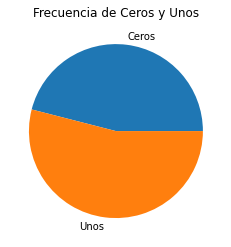

Co 21 n0 23, n1 27, n 50
Uco 25.34, Oco 12.085420408163266, Zo -1.248414626492295


In [44]:
numbers_test = [0.809, 0.042, 0.432, 0.538, 0.225, 0.88, 0.688, 0.772, 0.036, 0.854, \
                0.397, 0.268, 0.821, 0.897, 0.07, 0.721, 0.087, 0.35, 0.779, 0.482,  
                0.136, 0.855, 0.453, 0.197, 0.444, 0.799, 0.809, 0.691, 0.545, 0.857,
                0.692, 0.055, 0.348, 0.373, 0.436, 0.29, 0.015, 0.834, 0.599, 0.724,
                0.564, 0.709, 0.946, 0.754, 0.677, 0.128, 0.012, 0.498, 0.6, 0.913]

corrida_test(numbers_test)

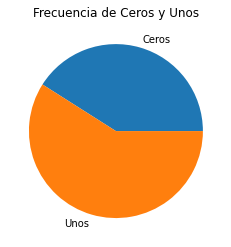

Co 49 n0 41, n1 59, n 100
Uco 48.88, Oco 23.153983838383837, Zo 0.02493838832056819


In [45]:
# Cuadrados Medios
middle_square = middle_square_generator(Xo = 74731897457, 
                                        n = 7, 
                                        iter = 100)

corrida_test(middle_square)

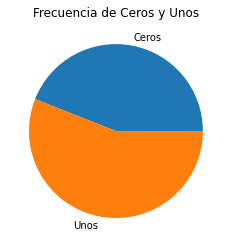

Co 45 n0 44, n1 56, n 100
Uco 49.78, Oco 24.032711111111112, Zo -0.9750491625213825


In [46]:
linear_congruential = linear_congruential_generator(Xo = 7, 
                                                    a = 74731897457, 
                                                    b = 37747318974, 
                                                    m = 19, 
                                                    iter = 100)
corrida_test(linear_congruential)

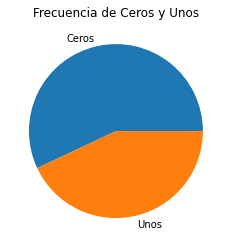

Co 46 n0 57, n1 43, n 100
Uco 49.52, Oco 23.77717575757576, Zo -0.7218758774415761


In [52]:
python = python_generator()

corrida_test(python)

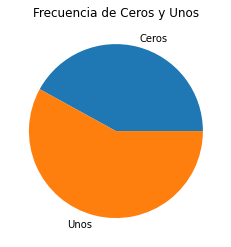

Co 48 n0 42, n1 58, n 100
Uco 49.22, Oco 23.484024242424244, Zo -0.25175237171777376


In [49]:
tausworthe = tausworthe_generator(seed = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
                                  r = 7, 
                                  q = 15, 
                                  l = 7, 
                                  n = 100, 
                                  period=False)

corrida_test(tausworthe)